# Data Engineering

In [120]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
from collections import Counter

df = pd.read_csv("vehicles.csv", index_col="id", parse_dates=True, infer_datetime_format=True)

print(list(df.columns))

df = df.drop([
    "url",
    "region",
    "region_url",
    "image_url",
    "description",
    "VIN"
], axis="columns")

df = df.dropna(subset=["price", "year", "odometer", "lat", "long"])
df[["price", "year", "odometer"]] = df[["price", "year", "odometer"]].astype(int)

df["price"] = round(df["price"], -3)

cnt_keys = np.array(list(Counter(df["price"]).keys()))
cnt_vals = list(Counter(df["price"]).values())

df = df[df["price"].isin(cnt_keys[np.abs(stats.zscore(cnt_vals)) < 1])]

df = df[(np.abs(stats.zscore(df[["price", "odometer", "lat", "long"]])) < 1).all(axis=1)]

display(df)
df.to_csv("clean.csv")

['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7316814884,34000,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,NaN,NaN,pickup,white,NaN,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
7316814989,40000,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,NaN,NaN,pickup,red,NaN,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
7316743432,31000,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,NaN,NaN,pickup,red,NaN,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
7316304717,35000,2016,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499,clean,other,4wd,NaN,pickup,silver,NaN,al,32.590000,-85.480000,2021-05-03T12:41:33-0500
7316285779,35000,2019,toyota,tacoma,excellent,6 cylinders,gas,43000,clean,automatic,4wd,NaN,truck,grey,NaN,al,32.601300,-85.443974,2021-05-03T12:12:59-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301591199,34000,2018,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814,clean,automatic,rwd,NaN,sedan,white,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600
7301591187,31000,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
7301591147,35000,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600


PermissionError: [Errno 13] Permission denied: 'clean.csv'

# Univariate Analysis

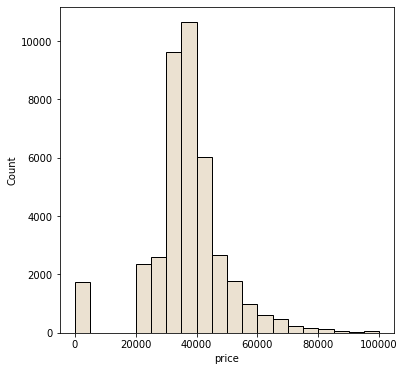

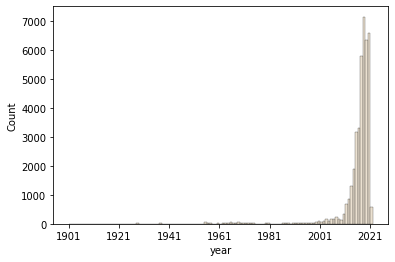

<Figure size 432x288 with 0 Axes>

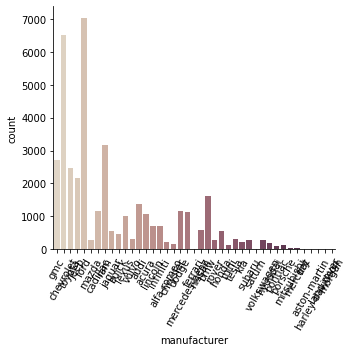

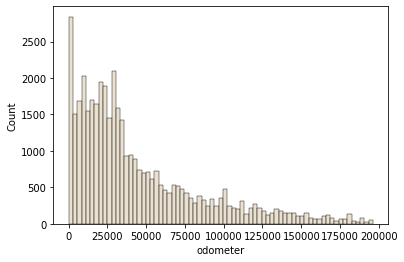

<Figure size 432x288 with 0 Axes>

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML("""
    <style>
        .output_png {
            display: table-cell;
            text-align: center;
            vertical-align: middle;
        }
    </style>
""")

plt.figure(figsize=(6,6))

sns.set_palette("ch:.25")
sns.histplot(df["price"], bins=np.arange(0, 100001, step=5000))
plt.show()
plt.savefig("price_dist.png")

sns.histplot(df["year"], bins=np.arange(min(df["year"]), max(df["year"]) + 1))
plt.xticks(np.arange(min(df["year"]), max(df["year"]) + 1, step=20))
plt.show()
plt.savefig("year_dist.png")

sns.catplot(data=df, x="manufacturer", kind="count", palette="ch:.25")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()
plt.savefig("manufacturer_dist.png")

sns.histplot(df["odometer"])
plt.show()
plt.savefig("odometer_dist.png")

# Playground

In [155]:
print("test")
print(df["price"])

test
id
7316814884    34000
7316814989    40000
7316743432    31000
7316304717    35000
7316285779    35000
              ...  
7301591199    34000
7301591187    31000
7301591147    35000
7301591140    29000
7301591129    31000
Name: price, Length: 40446, dtype: int32
